# 文字与注释

一个优秀的可视化作品就是给读者讲一个精彩的故事。虽然在一些场景中，这个故事可以完全通过视觉来表达，不需要任何多余的文字。但在另外一些场景中，辅之以少量的文字提示（`textual cue`）和标签是必不可少的。  
虽然最基本的注释（`annotation`）类型可能只是坐标轴标题与图标题，但注释可远远不止这些。  
让我们可视化一些数据，看看如何通过添加注释来更恰当地表达信息。

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

## 1. 案例：节假日对美国出生率的影响

In [2]:
births = pd.read_csv('../data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
# The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
# births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.index = [datetime.datetime(2012, month, day) for (month, day) in births_by_date.index]

<AxesSubplot:>

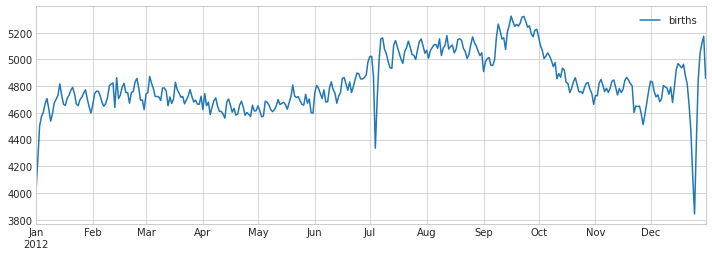

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)  # 日均出生人数统计图

在用这样的图表达观点时，如果可以在图中增加一些注释，就更能吸引读者的注意了。  
可以通过 `plt.text/ax.text` 命令手动添加注释，它们可以在具体的 `x / y` 坐标点上放上文字。

`ax.text` 方法需要一个 `x` 轴坐标、一个 `y` 轴坐标、一个字符串和一些可选参数，比如文字的颜色、字号、风格、对齐方式以及其他文字属性。  
这里用了 `ha='right'` 与 `ha='center'`，`ha` 是**水平对齐方式**（`horizonal alignment`）的缩写。

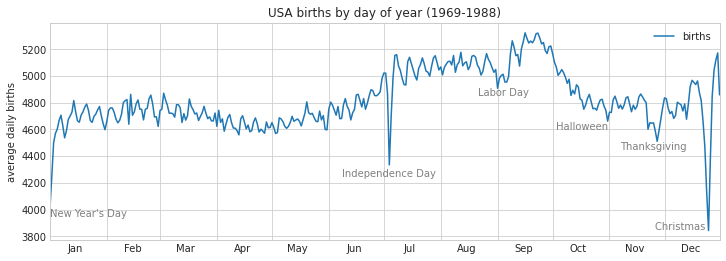

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加文字标签
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

## 2. 坐标变换与文字位置

前面的示例将文字放在了目标数据的位置上。但有时候可能需要将文字放在与数据无关的位置上，比如坐标轴或者图形中。  
在 `Matplotlib` 中，我们通过调整**坐标变换**（`transform`）来实现。  
任何图形显示框架都需要一些变换坐标系的机制。用数学方法处理这种坐标系变换很简单，`Matplotlib` 有一组非常棒的工具可以实现类似功能（这些工具位于 `matplotlib.transforms` 子模块中）。  
虽然一般用户并不需要关心这些变换的细节，但是了解这些知识对在图上放置文字大有帮助。一共有三种解决这类问题的预定义变换方式。
- `ax.transData`
    - 以数据为基准的坐标变换。
- `ax.transAxes`
    - 以坐标轴为基准的坐标变换（以坐标轴维度为单位）。
- `fig.transFigure`
    - 以图形为基准的坐标变换（以图形维度为单位）。

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

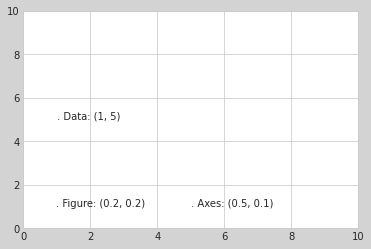

In [5]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)               # transData 坐标用 x 轴与 y 轴的标签作为数据坐标，虽然transform=ax.transData是默认值，但还是设置一下
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)       # transAxes 坐标以坐标轴（图中白色矩形）左下角的位置为原点，按坐标轴尺寸的比例呈现坐标
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)  # transFigure 坐标与 transAxes 类似，不过是以图形（图中灰色矩形）左下角的位置为原点，按图形尺寸的比例呈现坐标

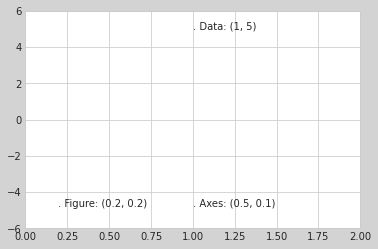

In [6]:
# 假如你改变了坐标轴上下限，那么只有 transData 坐标会受影响，其他坐标系都不变
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## 3. 箭头与注释

除了刻度线和文字，简单的箭头也是一种有用的注释标签。在 `Matplotlib` 里面画箭头通常比你想象的要困难。  
虽然有一个 `plt.arrow()` 函数可以实现这个功能，但是我不推荐使用它，因为它创建出的箭头是 `SVG` 向量图对象，会随着图形分辨率的变化而改变，最终的结果可能完全不是用户想要的。  
我要推荐的是 `plt.annotate()` 函数。这个函数既可以创建文字，也可以创建箭头，而且它创建的箭头能够进行非常灵活的配置。

Text(2, -6, 'local minimum')

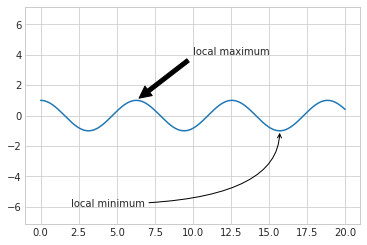

In [7]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

# 箭头的风格是通过 arrowprops 字典控制的，里面有许多可用的选项
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

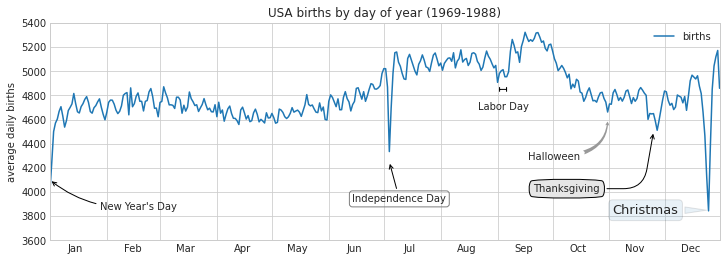

In [8]:
# 用前面的美国出生人数图来演示一些箭头注释
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加箭头标签
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data', xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data', xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none", connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data', xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data', xytext=(-30, 0), textcoords='offset points', size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);